In [0]:
## Credit: Sentdex

import torch
import torchvision
from torchvision import transforms, datasets
import matplotlib.pyplot as plt

In [2]:
train = datasets.MNIST("", train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

0it [00:00, ?it/s]

9920512it [00:01, 8437875.16it/s]                            


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


  0%|          | 0/28881 [00:00<?, ?it/s]

32768it [00:00, 128764.36it/s]           
  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:00, 2116004.80it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 48756.79it/s]            


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


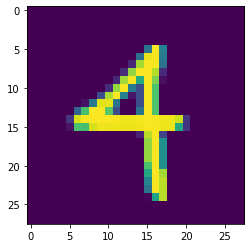

In [3]:
for data in trainset:
    plt.imshow(data[0][0].view([28, 28]))
    break

In [4]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i] / total * 100}")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [7]:
X = torch.rand((28, 28))
X = X.view(1, 28*28)
output = net(X)
output

tensor([[-2.2315, -2.3303, -2.4146, -2.2783, -2.3982, -2.3450, -2.2007, -2.2767,
         -2.2285, -2.3462]], grad_fn=<LogSoftmaxBackward>)

In [13]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28 * 28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0106, grad_fn=<NllLossBackward>)
tensor(0.0573, grad_fn=<NllLossBackward>)
tensor(0.1624, grad_fn=<NllLossBackward>)


In [14]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.98


tensor(6)


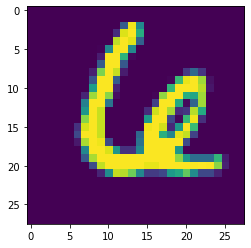

In [20]:
plt.imshow(X[2].view([28, 28]))
print(torch.argmax(net(X[2].view(-1, 784))[0]))